In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('iphone_purchase.csv')

In [3]:
df.sample(5)

,Gender,Age,Salary,Purchase Iphone
195,Male,34,43000,0
228,Female,40,72000,0
272,Male,60,42000,1
308,Male,36,125000,1
45,Male,23,20000,0


In [4]:
df.shape

(400, 4)

In [5]:
from sklearn.preprocessing import LabelEncoder

lbl_gender = LabelEncoder()

df['Gender'] = lbl_gender.fit_transform(df['Gender'])

In [6]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
X = df.drop('Purchase Iphone', axis='columns')
y = df['Purchase Iphone']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
len(X_train)

300

In [11]:
len(X_test)

100

In [12]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [13]:
model.score(X_test, y_test)

0.91

Our model is giving 93% accuracy.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
y_pred = model.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
import seaborn as sns

[]

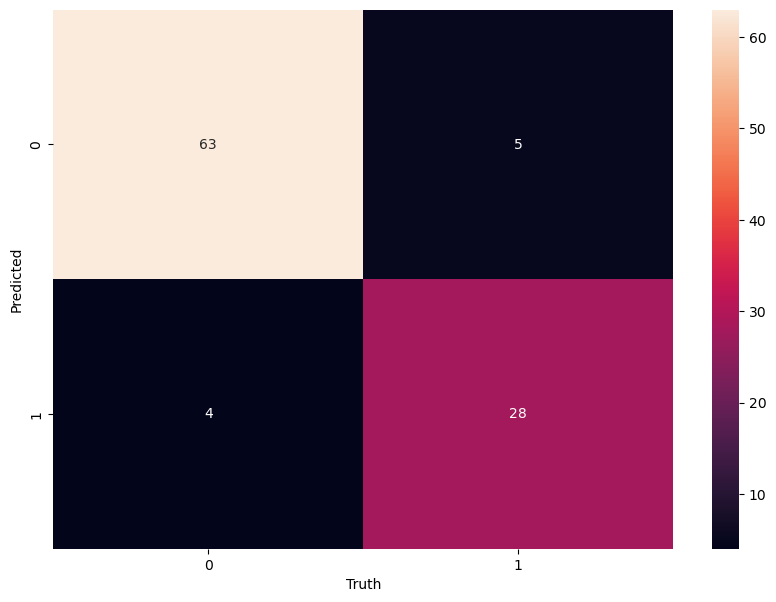

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

